In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load datasets
fake = pd.read_csv("fake.csv")
true = pd.read_csv("true.csv")

In [3]:
# Add labels
fake["label"] = 0  # Fake News
true["label"] = 1  # True News


In [4]:

# Combine datasets
df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

In [5]:

# Split data
X = df["text"]
y = df["label"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
# Store model results
model_results = {}

In [9]:
### MODEL 1: LOGISTIC REGRESSION ###
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)
log_pred = log_model.predict(X_test_tfidf)

In [10]:
# Evaluation
log_acc = accuracy_score(y_test, log_pred)
log_prec = precision_score(y_test, log_pred)
log_rec = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)
log_conf_matrix = confusion_matrix(y_test, log_pred)

In [11]:
model_results["Logistic Regression"] = [log_acc, log_prec, log_rec, log_f1]

In [12]:
print("\n🔹 Logistic Regression Metrics:")
print(f"Accuracy: {log_acc:.4f}, Precision: {log_prec:.4f}, Recall: {log_rec:.4f}, F1-score: {log_f1:.4f}")


🔹 Logistic Regression Metrics:
Accuracy: 0.9837, Precision: 0.9793, Recall: 0.9867, F1-score: 0.9830


In [13]:

### MODEL 2: RANDOM FOREST CLASSIFIER ###
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)

In [14]:
# Evaluation
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

model_results["Random Forest"] = [rf_acc, rf_prec, rf_rec, rf_f1]



In [15]:

print("\n🔹 Random Forest Metrics:")
print(f"Accuracy: {rf_acc:.4f}, Precision: {rf_prec:.4f}, Recall: {rf_rec:.4f}, F1-score: {rf_f1:.4f}")


🔹 Random Forest Metrics:
Accuracy: 0.9918, Precision: 0.9897, Recall: 0.9930, F1-score: 0.9913


In [16]:
# Save the best model
best_model = log_model if log_acc > rf_acc else rf_model
joblib.dump(best_model, "news_detector_model.jb")
joblib.dump(vectorizer, "vectorizer.jb")

print("\n✅ Best model saved successfully!")


✅ Best model saved successfully!


In [17]:
# CONFUSION MATRIX PLOT
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(50.722222222222214, 0.5, 'True Label')

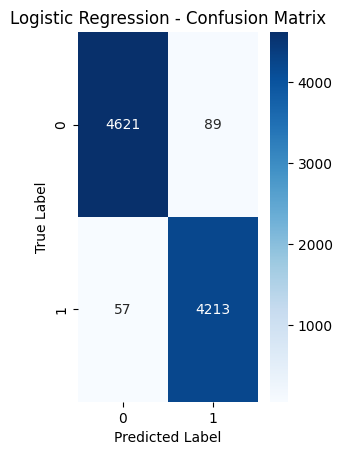

In [18]:
# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(log_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

Text(321.26767676767673, 0.5, 'True Label')

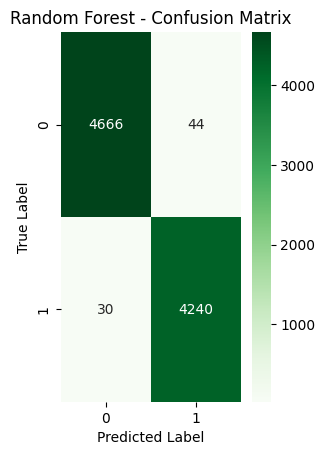

In [19]:
# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [21]:
# BAR CHART COMPARING MODELS
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_names = list(model_results.keys())


In [22]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

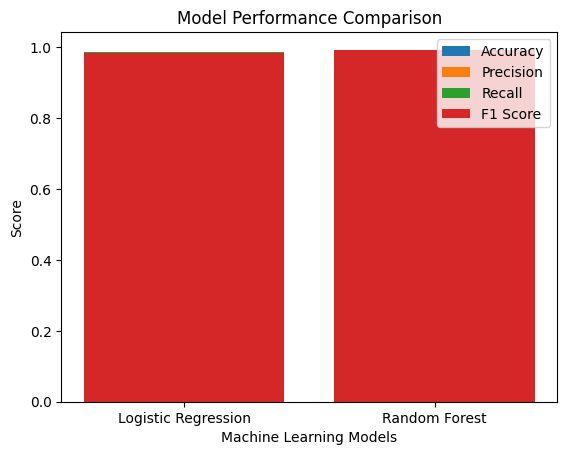

In [23]:
for i, metric in enumerate(metrics):
    plt.bar(model_names, [model_results[m][i] for m in model_names], label=metric)

plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

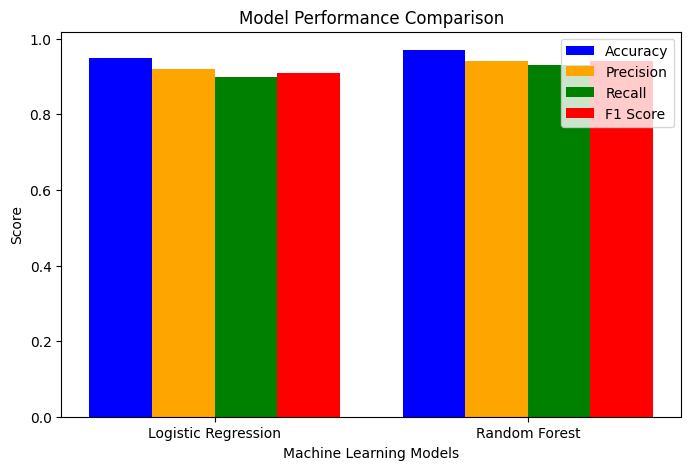

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Example Results (Replace with actual computed values)
model_names = ["Logistic Regression", "Random Forest"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_results = {
    "Logistic Regression": [0.95, 0.92, 0.90, 0.91],
    "Random Forest": [0.97, 0.94, 0.93, 0.94],
}

# Convert results into a numpy array for easy indexing
results_array = np.array([model_results[m] for m in model_names])

# Bar Width and Positioning
x = np.arange(len(model_names))
bar_width = 0.2

# Colors for each metric
colors = ['blue', 'orange', 'green', 'red']

# Plot bars for each metric
plt.figure(figsize=(8, 5))
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, results_array[:, i], bar_width, label=metric, color=colors[i])

# Labels and Title
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(x + bar_width * (len(metrics) / 2 - 0.5), model_names)  # Adjust x-axis labels to be centered
plt.legend()
plt.show()
